# Importando Bibliotecas

In [26]:
import pickle
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

# Naïve Bayes

## Base Risco de Cèdito

In [16]:
data_risco_cedito = pd.read_csv('risco_credito.csv')

In [17]:
data_risco_cedito

historia divida garantias     renda     risco
0           ruim   alta   nenhuma      0_15      alto
1   desconhecida   alta   nenhuma     15_35      alto
2   desconhecida  baixa   nenhuma     15_35  moderado
3   desconhecida  baixa   nenhuma  acima_35      alto
4   desconhecida  baixa   nenhuma  acima_35     baixo
5   desconhecida  baixa  adequada  acima_35     baixo
6           ruim  baixa   nenhuma      0_15      alto
7           ruim  baixa  adequada  acima_35  moderado
8            boa  baixa   nenhuma  acima_35     baixo
9            boa   alta  adequada  acima_35     baixo
10           boa   alta   nenhuma      0_15      alto
11           boa   alta   nenhuma     15_35  moderado
12           boa   alta   nenhuma  acima_35     baixo
13          ruim   alta   nenhuma     15_35      alto

In [18]:
x_risco_credito = data_risco_cedito.iloc[:, 0:4].values
x_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [19]:
y_risco_credito = data_risco_cedito.iloc[:, 4].values
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

from sklearn.preprocessing import LabelEncoder

In [20]:
label_enconder_historia	= LabelEncoder()
label_enconder_divida = LabelEncoder()
label_enconder_garantias = LabelEncoder()
label_enconder_renda = LabelEncoder()	


In [21]:
x_risco_credito[:, 0] = label_enconder_historia.fit_transform(x_risco_credito[:, 0])
x_risco_credito[:, 1] = label_enconder_divida.fit_transform(x_risco_credito[:, 1])
x_risco_credito[:, 2] = label_enconder_garantias.fit_transform(x_risco_credito[:, 2])
x_risco_credito[:, 3] = label_enconder_renda.fit_transform(x_risco_credito[:, 3])

In [22]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

import pickle

In [25]:
with open ('risco_credito.plk', 'wb') as f:
    pickle.dump([x_risco_credito, y_risco_credito], f)

from sklearn.naive_bayes import GaussianNB

In [28]:
naive_risco_crdito = GaussianNB()
naive_risco_crdito.fit(x_risco_credito, y_risco_credito)

GaussianNB()

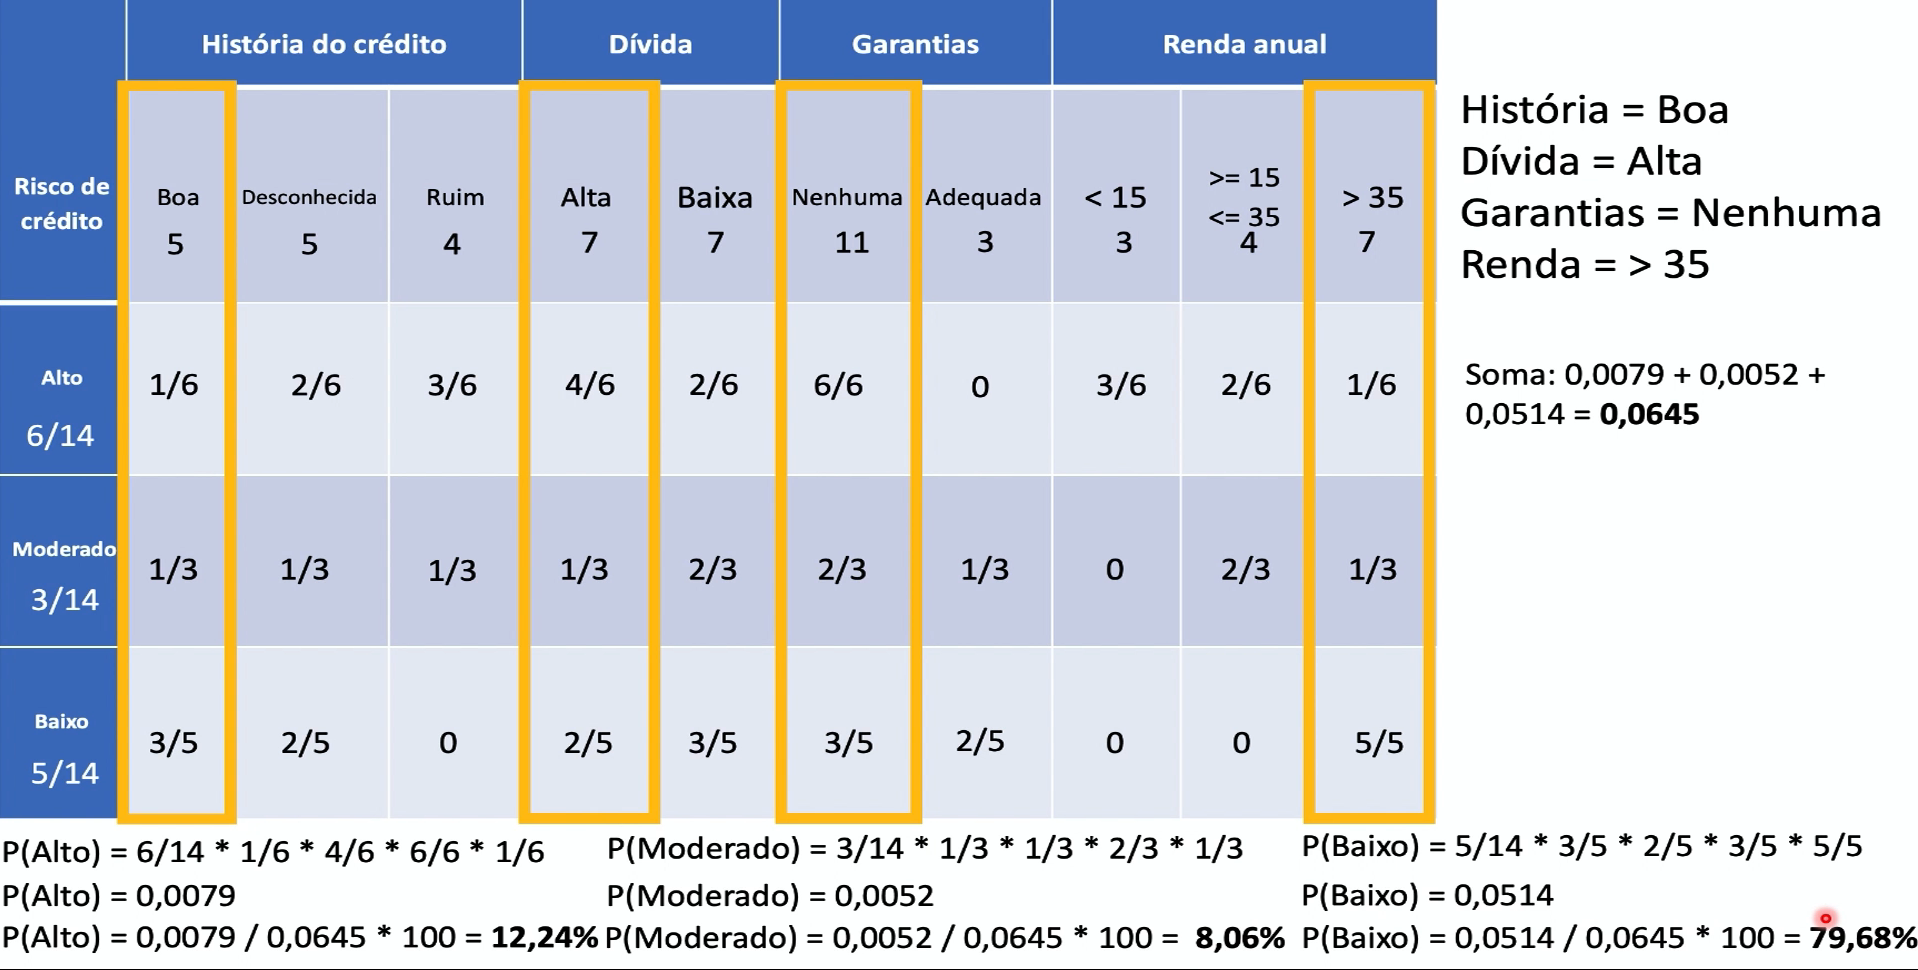

história boa (0), dívida alta (0), garantias nenhuma (1), renda > 35 (2)

história ruim (2), dívida alta (0), garantias adequada (0), renda < 15 (0)

In [30]:
previsao = naive_risco_crdito.predict([[0, 0, 1, 2], [2, 0, 0, 0]])

In [31]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [32]:
naive_risco_crdito.classes_

array(['alto', 'baixo', 'moderado'], dtype='<U8')

In [33]:
naive_risco_crdito.class_count_

array([6., 5., 3.])

In [34]:
naive_risco_crdito.class_prior_

array([0.42857143, 0.35714286, 0.21428571])

## Base Credit Data

## Base Census 